In [6]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

from tensorflow.keras.preprocessing import image_dataset_from_directory

Found 22000 files belonging to 2 classes.
Found 3000 files belonging to 2 classes.
Epoch 1/250
172/172 [==============================] - 69s 402ms/step - loss: 0.6723 - accuracy: 0.5398 - val_loss: 0.6416 - val_accuracy: 0.6180
Epoch 2/250
172/172 [==============================] - 73s 422ms/step - loss: 0.6344 - accuracy: 0.6165 - val_loss: 0.6577 - val_accuracy: 0.6610
Epoch 3/250
172/172 [==============================] - 72s 419ms/step - loss: 0.6117 - accuracy: 0.6442 - val_loss: 0.5699 - val_accuracy: 0.6893
Epoch 4/250
172/172 [==============================] - 73s 424ms/step - loss: 0.5840 - accuracy: 0.6705 - val_loss: 0.5654 - val_accuracy: 0.7370
Epoch 5/250
172/172 [==============================] - 73s 422ms/step - loss: 0.5590 - accuracy: 0.6900 - val_loss: 0.5229 - val_accuracy: 0.7360
Epoch 6/250
172/172 [==============================] - 73s 423ms/step - loss: 0.5440 - accuracy: 0.7042 - val_loss: 0.5107 - val_accuracy: 0.7413
Epoch 7/250
172/172 [====================

Epoch 110/250
172/172 [==============================] - 72s 421ms/step - loss: 0.1697 - accuracy: 0.9262 - val_loss: 0.2558 - val_accuracy: 0.9140
Epoch 111/250
172/172 [==============================] - 73s 425ms/step - loss: 0.1690 - accuracy: 0.9265 - val_loss: 0.2405 - val_accuracy: 0.9157
Epoch 112/250
172/172 [==============================] - 73s 422ms/step - loss: 0.1629 - accuracy: 0.9294 - val_loss: 0.2236 - val_accuracy: 0.9170
Epoch 113/250
172/172 [==============================] - 73s 422ms/step - loss: 0.1626 - accuracy: 0.9295 - val_loss: 0.2032 - val_accuracy: 0.9243
Epoch 114/250
172/172 [==============================] - 73s 424ms/step - loss: 0.1592 - accuracy: 0.9305 - val_loss: 0.2012 - val_accuracy: 0.9137
Epoch 115/250
172/172 [==============================] - 73s 426ms/step - loss: 0.1573 - accuracy: 0.9335 - val_loss: 0.1794 - val_accuracy: 0.9243
Epoch 116/250
172/172 [==============================] - 73s 423ms/step - loss: 0.1540 - accuracy: 0.9364 - val_

172/172 [==============================] - 73s 422ms/step - loss: 0.0591 - accuracy: 0.9766 - val_loss: 0.1759 - val_accuracy: 0.9360
Epoch 221/250
172/172 [==============================] - 73s 425ms/step - loss: 0.0606 - accuracy: 0.9759 - val_loss: 0.2184 - val_accuracy: 0.9390
Epoch 222/250
172/172 [==============================] - 72s 421ms/step - loss: 0.0618 - accuracy: 0.9752 - val_loss: 0.1982 - val_accuracy: 0.9327
Epoch 223/250
172/172 [==============================] - 73s 424ms/step - loss: 0.0626 - accuracy: 0.9749 - val_loss: 0.1986 - val_accuracy: 0.9403
Epoch 224/250
172/172 [==============================] - 73s 422ms/step - loss: 0.0625 - accuracy: 0.9760 - val_loss: 0.1925 - val_accuracy: 0.9353
Epoch 225/250
172/172 [==============================] - 73s 423ms/step - loss: 0.0586 - accuracy: 0.9768 - val_loss: 0.2270 - val_accuracy: 0.9357
Epoch 226/250
172/172 [==============================] - 73s 423ms/step - loss: 0.0628 - accuracy: 0.9744 - val_loss: 0.2178 -

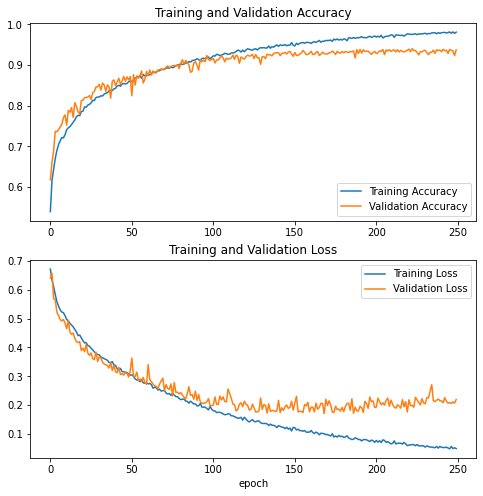

In [7]:
# from scratch


PATH = '../cats_and_dogs_large/'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

BATCH_SIZE = 128
IMG_SIZE = (160, 160)
BUFFER_SIZE = BATCH_SIZE*5

train_dataset = image_dataset_from_directory(train_dir,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE)

validation_dataset = image_dataset_from_directory(validation_dir,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  image_size=IMG_SIZE)

train_dataset = train_dataset.prefetch(buffer_size=BUFFER_SIZE)
validation_dataset = validation_dataset.prefetch(buffer_size=BUFFER_SIZE)

# Create the base model 
base_model = tf.keras.applications.VGG16(input_shape=(160,160,3),
                                               include_top=False,
                                               weights=None)

# process data
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.Rescaling(1./127.5, offset= -1)
])

# flattening
flatten = tf.keras.layers.Flatten()

# final layer
prediction_layer = tf.keras.layers.Dense(1)

# construct a new network
inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = base_model(x)
x = flatten(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

len(model.trainable_variables)

base_learning_rate = 0.0001
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.Adam(lr=base_learning_rate/10),
              metrics=['accuracy'])

history_fine = model.fit(train_dataset,
                         epochs=250,
                         validation_data=validation_dataset)

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(history_fine.history['accuracy'], label='Training Accuracy')
plt.plot(history_fine.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(history_fine.history['loss'], label='Training Loss')
plt.plot(history_fine.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

Found 22000 files belonging to 2 classes.
Found 3000 files belonging to 2 classes.
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 160, 160, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 160, 160, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 80, 80, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 80, 80, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 80, 80, 128)       147584    
____________________________________________

Epoch 37/250
172/172 [==============================] - 23s 136ms/step - loss: 0.2617 - accuracy: 0.8808 - val_loss: 0.1732 - val_accuracy: 0.9323
Epoch 38/250
172/172 [==============================] - 23s 136ms/step - loss: 0.2576 - accuracy: 0.8845 - val_loss: 0.1722 - val_accuracy: 0.9337
Epoch 39/250
172/172 [==============================] - 23s 136ms/step - loss: 0.2548 - accuracy: 0.8844 - val_loss: 0.1712 - val_accuracy: 0.9340
Epoch 40/250
172/172 [==============================] - 24s 137ms/step - loss: 0.2509 - accuracy: 0.8877 - val_loss: 0.1700 - val_accuracy: 0.9347
Epoch 41/250
172/172 [==============================] - 24s 137ms/step - loss: 0.2509 - accuracy: 0.8873 - val_loss: 0.1687 - val_accuracy: 0.9347
Epoch 42/250
172/172 [==============================] - 23s 136ms/step - loss: 0.2506 - accuracy: 0.8869 - val_loss: 0.1679 - val_accuracy: 0.9347
Epoch 43/250
172/172 [==============================] - 23s 137ms/step - loss: 0.2513 - accuracy: 0.8865 - val_loss: 0

Epoch 93/250
172/172 [==============================] - 23s 137ms/step - loss: 0.2169 - accuracy: 0.9030 - val_loss: 0.1461 - val_accuracy: 0.9397
Epoch 94/250
172/172 [==============================] - 24s 137ms/step - loss: 0.2166 - accuracy: 0.9036 - val_loss: 0.1465 - val_accuracy: 0.9397
Epoch 95/250
172/172 [==============================] - 23s 136ms/step - loss: 0.2161 - accuracy: 0.9052 - val_loss: 0.1457 - val_accuracy: 0.9397
Epoch 96/250
172/172 [==============================] - 24s 137ms/step - loss: 0.2158 - accuracy: 0.9035 - val_loss: 0.1450 - val_accuracy: 0.9407
Epoch 97/250
172/172 [==============================] - 24s 137ms/step - loss: 0.2145 - accuracy: 0.9030 - val_loss: 0.1457 - val_accuracy: 0.9403
Epoch 98/250
172/172 [==============================] - 24s 137ms/step - loss: 0.2133 - accuracy: 0.9029 - val_loss: 0.1450 - val_accuracy: 0.9400
Epoch 99/250
172/172 [==============================] - 24s 137ms/step - loss: 0.2144 - accuracy: 0.9030 - val_loss: 0

172/172 [==============================] - 24s 137ms/step - loss: 0.1974 - accuracy: 0.9128 - val_loss: 0.1337 - val_accuracy: 0.9457
Epoch 204/250
172/172 [==============================] - 23s 136ms/step - loss: 0.1980 - accuracy: 0.9114 - val_loss: 0.1344 - val_accuracy: 0.9460
Epoch 205/250
172/172 [==============================] - 24s 137ms/step - loss: 0.1952 - accuracy: 0.9125 - val_loss: 0.1340 - val_accuracy: 0.9457
Epoch 206/250
172/172 [==============================] - 23s 136ms/step - loss: 0.1983 - accuracy: 0.9117 - val_loss: 0.1335 - val_accuracy: 0.9453
Epoch 207/250
172/172 [==============================] - 23s 136ms/step - loss: 0.1947 - accuracy: 0.9131 - val_loss: 0.1341 - val_accuracy: 0.9457
Epoch 208/250
172/172 [==============================] - 23s 136ms/step - loss: 0.1968 - accuracy: 0.9112 - val_loss: 0.1340 - val_accuracy: 0.9453
Epoch 209/250
172/172 [==============================] - 24s 137ms/step - loss: 0.1954 - accuracy: 0.9128 - val_loss: 0.1336 -

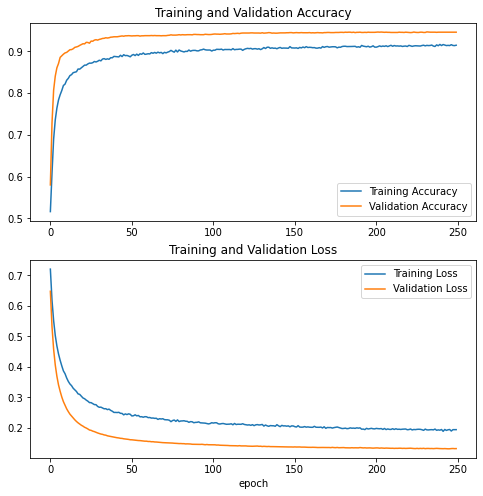

In [8]:
# transfer learning

PATH = '../cats_and_dogs_large/'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

BATCH_SIZE = 128
IMG_SIZE = (160, 160)
BUFFER_SIZE = BATCH_SIZE*5

train_dataset = image_dataset_from_directory(train_dir,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE)

validation_dataset = image_dataset_from_directory(validation_dir,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  image_size=IMG_SIZE)

train_dataset = train_dataset.prefetch(buffer_size=BUFFER_SIZE)
validation_dataset = validation_dataset.prefetch(buffer_size=BUFFER_SIZE)

# Create the base model 
base_model = tf.keras.applications.VGG16(input_shape=(160,160,3),
                                               include_top=False,
                                               weights='imagenet')
base_model.summary()

# freeze the base model
base_model.trainable = False

# process data
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.Rescaling(1./127.5, offset= -1)
])

# flattening
flatten = tf.keras.layers.Flatten()

# final layer
prediction_layer = tf.keras.layers.Dense(1)

# construct a new network
inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = base_model(x)
x = flatten(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

print(len(base_model.trainable_variables))
print(len(model.trainable_variables))

base_learning_rate = 0.0001
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.Adam(lr=base_learning_rate/10),
              metrics=['accuracy'])

history_fine = model.fit(train_dataset,
                         epochs=250,
                         validation_data=validation_dataset)

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(history_fine.history['accuracy'], label='Training Accuracy')
plt.plot(history_fine.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(history_fine.history['loss'], label='Training Loss')
plt.plot(history_fine.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

Found 22000 files belonging to 2 classes.
Found 3000 files belonging to 2 classes.
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 160, 160, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 160, 160, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 160, 160, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 80, 80, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 80, 80, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 80, 80, 128)       147584    
____________________________________________

Epoch 37/250
172/172 [==============================] - 27s 155ms/step - loss: 0.0388 - accuracy: 0.9865 - val_loss: 0.0933 - val_accuracy: 0.9740
Epoch 38/250
172/172 [==============================] - 27s 155ms/step - loss: 0.0348 - accuracy: 0.9874 - val_loss: 0.0871 - val_accuracy: 0.9750
Epoch 39/250
172/172 [==============================] - 26s 154ms/step - loss: 0.0361 - accuracy: 0.9872 - val_loss: 0.0957 - val_accuracy: 0.9727
Epoch 40/250
172/172 [==============================] - 27s 154ms/step - loss: 0.0338 - accuracy: 0.9878 - val_loss: 0.0796 - val_accuracy: 0.9743
Epoch 41/250
172/172 [==============================] - 27s 155ms/step - loss: 0.0314 - accuracy: 0.9882 - val_loss: 0.1027 - val_accuracy: 0.9717
Epoch 42/250
172/172 [==============================] - 26s 154ms/step - loss: 0.0317 - accuracy: 0.9885 - val_loss: 0.1218 - val_accuracy: 0.9700
Epoch 43/250
172/172 [==============================] - 27s 154ms/step - loss: 0.0319 - accuracy: 0.9873 - val_loss: 0

Epoch 93/250
172/172 [==============================] - 27s 154ms/step - loss: 0.0072 - accuracy: 0.9977 - val_loss: 0.1253 - val_accuracy: 0.9740
Epoch 94/250
172/172 [==============================] - 26s 154ms/step - loss: 0.0116 - accuracy: 0.9956 - val_loss: 0.1225 - val_accuracy: 0.9763
Epoch 95/250
172/172 [==============================] - 27s 155ms/step - loss: 0.0050 - accuracy: 0.9989 - val_loss: 0.1337 - val_accuracy: 0.9757
Epoch 96/250
172/172 [==============================] - 27s 155ms/step - loss: 0.0070 - accuracy: 0.9978 - val_loss: 0.1191 - val_accuracy: 0.9760
Epoch 97/250
172/172 [==============================] - 27s 155ms/step - loss: 0.0085 - accuracy: 0.9973 - val_loss: 0.1419 - val_accuracy: 0.9703
Epoch 98/250
172/172 [==============================] - 27s 155ms/step - loss: 0.0069 - accuracy: 0.9980 - val_loss: 0.1364 - val_accuracy: 0.9727
Epoch 99/250
172/172 [==============================] - 27s 155ms/step - loss: 0.0059 - accuracy: 0.9980 - val_loss: 0

172/172 [==============================] - 27s 155ms/step - loss: 0.0019 - accuracy: 0.9994 - val_loss: 0.1941 - val_accuracy: 0.9727
Epoch 204/250
172/172 [==============================] - 27s 154ms/step - loss: 0.0020 - accuracy: 0.9993 - val_loss: 0.1743 - val_accuracy: 0.9747
Epoch 205/250
172/172 [==============================] - 26s 154ms/step - loss: 0.0028 - accuracy: 0.9991 - val_loss: 0.1664 - val_accuracy: 0.9733
Epoch 206/250
172/172 [==============================] - 27s 155ms/step - loss: 0.0024 - accuracy: 0.9991 - val_loss: 0.2180 - val_accuracy: 0.9700
Epoch 207/250
172/172 [==============================] - 27s 155ms/step - loss: 0.0023 - accuracy: 0.9992 - val_loss: 0.2190 - val_accuracy: 0.9717
Epoch 208/250
172/172 [==============================] - 27s 154ms/step - loss: 0.0029 - accuracy: 0.9991 - val_loss: 0.1749 - val_accuracy: 0.9743
Epoch 209/250
172/172 [==============================] - 27s 155ms/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.1692 -

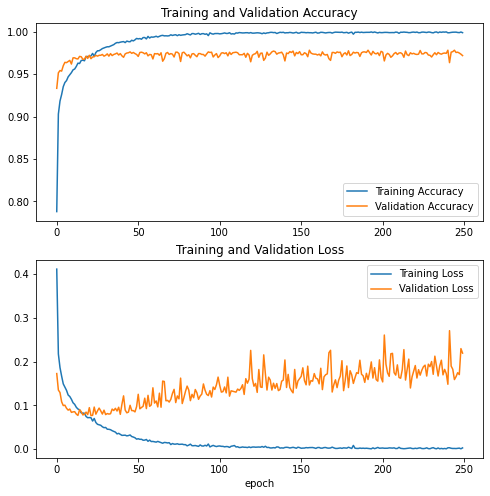

In [9]:
# fine tuning

PATH = '../cats_and_dogs_large/'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

BATCH_SIZE = 128
IMG_SIZE = (160, 160)
BUFFER_SIZE = BATCH_SIZE*5

train_dataset = image_dataset_from_directory(train_dir,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE)

validation_dataset = image_dataset_from_directory(validation_dir,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  image_size=IMG_SIZE)

train_dataset = train_dataset.prefetch(buffer_size=BUFFER_SIZE)
validation_dataset = validation_dataset.prefetch(buffer_size=BUFFER_SIZE)

# Create the base model 
base_model = tf.keras.applications.VGG16(input_shape=(160,160,3),
                                               include_top=False,
                                               weights='imagenet')
base_model.summary()

# Freeze some first the layers
fine_tune_at = 14
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable =  False

# process data
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.Rescaling(1./127.5, offset= -1)
])

# flattening
flatten = tf.keras.layers.Flatten()

# final layer
prediction_layer = tf.keras.layers.Dense(1)

# construct a new network
inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = base_model(x)
x = flatten(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

print(len(base_model.trainable_variables))
print(len(model.trainable_variables))

base_learning_rate = 0.0001
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.Adam(lr=base_learning_rate/10),
              metrics=['accuracy'])

history_fine = model.fit(train_dataset,
                         epochs=250,
                         validation_data=validation_dataset)

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(history_fine.history['accuracy'], label='Training Accuracy')
plt.plot(history_fine.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(history_fine.history['loss'], label='Training Loss')
plt.plot(history_fine.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

Found 22000 files belonging to 2 classes.
Found 3000 files belonging to 2 classes.
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 160, 160, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 160, 160, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 160, 160, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 80, 80, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 80, 80, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 80, 80, 128)       147584    
____________________________________________

Epoch 35/250
172/172 [==============================] - 73s 426ms/step - loss: 0.0109 - accuracy: 0.9962 - val_loss: 0.1087 - val_accuracy: 0.9817
Epoch 36/250
172/172 [==============================] - 73s 425ms/step - loss: 0.0127 - accuracy: 0.9953 - val_loss: 0.0742 - val_accuracy: 0.9847
Epoch 37/250
172/172 [==============================] - 73s 425ms/step - loss: 0.0094 - accuracy: 0.9966 - val_loss: 0.0581 - val_accuracy: 0.9850
Epoch 38/250
172/172 [==============================] - 73s 424ms/step - loss: 0.0116 - accuracy: 0.9962 - val_loss: 0.0621 - val_accuracy: 0.9827
Epoch 39/250
172/172 [==============================] - 73s 425ms/step - loss: 0.0107 - accuracy: 0.9957 - val_loss: 0.0637 - val_accuracy: 0.9860
Epoch 40/250
172/172 [==============================] - 73s 425ms/step - loss: 0.0069 - accuracy: 0.9977 - val_loss: 0.0938 - val_accuracy: 0.9837
Epoch 41/250
172/172 [==============================] - 73s 424ms/step - loss: 0.0088 - accuracy: 0.9970 - val_loss: 0

Epoch 91/250
172/172 [==============================] - 73s 424ms/step - loss: 0.0048 - accuracy: 0.9980 - val_loss: 0.0853 - val_accuracy: 0.9853
Epoch 92/250
172/172 [==============================] - 73s 423ms/step - loss: 0.0042 - accuracy: 0.9985 - val_loss: 0.0837 - val_accuracy: 0.9850
Epoch 93/250
172/172 [==============================] - 73s 424ms/step - loss: 0.0049 - accuracy: 0.9983 - val_loss: 0.0871 - val_accuracy: 0.9853
Epoch 94/250
172/172 [==============================] - 73s 426ms/step - loss: 0.0023 - accuracy: 0.9993 - val_loss: 0.0791 - val_accuracy: 0.9867
Epoch 95/250
172/172 [==============================] - 73s 422ms/step - loss: 8.3810e-04 - accuracy: 0.9998 - val_loss: 0.0908 - val_accuracy: 0.9860
Epoch 96/250
172/172 [==============================] - 73s 424ms/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 0.0955 - val_accuracy: 0.9850
Epoch 97/250
172/172 [==============================] - 73s 423ms/step - loss: 0.0027 - accuracy: 0.9989 - val_los

Epoch 201/250
172/172 [==============================] - 73s 424ms/step - loss: 2.1546e-04 - accuracy: 1.0000 - val_loss: 0.1062 - val_accuracy: 0.9870
Epoch 202/250
172/172 [==============================] - 73s 426ms/step - loss: 1.1228e-04 - accuracy: 1.0000 - val_loss: 0.1085 - val_accuracy: 0.9867
Epoch 203/250
172/172 [==============================] - 73s 426ms/step - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.0995 - val_accuracy: 0.9860
Epoch 204/250
172/172 [==============================] - 74s 427ms/step - loss: 0.0032 - accuracy: 0.9985 - val_loss: 0.0857 - val_accuracy: 0.9850
Epoch 205/250
172/172 [==============================] - 73s 423ms/step - loss: 4.0528e-04 - accuracy: 0.9999 - val_loss: 0.1037 - val_accuracy: 0.9853
Epoch 206/250
172/172 [==============================] - 73s 425ms/step - loss: 0.0017 - accuracy: 0.9995 - val_loss: 0.1063 - val_accuracy: 0.9853
Epoch 207/250
172/172 [==============================] - 73s 425ms/step - loss: 0.0030 - accuracy: 0

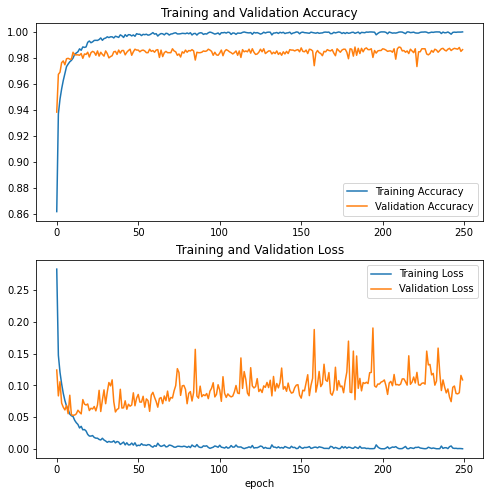

In [10]:
# flatten

PATH = '../cats_and_dogs_large/'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

BATCH_SIZE = 128
IMG_SIZE = (160, 160)
BUFFER_SIZE = BATCH_SIZE*5

train_dataset = image_dataset_from_directory(train_dir,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE)

validation_dataset = image_dataset_from_directory(validation_dir,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  image_size=IMG_SIZE)

train_dataset = train_dataset.prefetch(buffer_size=BUFFER_SIZE)
validation_dataset = validation_dataset.prefetch(buffer_size=BUFFER_SIZE)

# Create the base model 
base_model = tf.keras.applications.VGG16(input_shape=(160,160,3),
                                               include_top=False,
                                               weights='imagenet')
base_model.summary()

# process data
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.Rescaling(1./127.5, offset= -1)
])

# flattening
flatten = tf.keras.layers.Flatten()

# final layer
prediction_layer = tf.keras.layers.Dense(1)

# construct a new network
inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = base_model(x)
x = flatten(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

print(len(base_model.trainable_variables))
print(len(model.trainable_variables))

base_learning_rate = 0.0001
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.Adam(lr=base_learning_rate/10),
              metrics=['accuracy'])

history_fine = model.fit(train_dataset,
                         epochs=250,
                         validation_data=validation_dataset)

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(history_fine.history['accuracy'], label='Training Accuracy')
plt.plot(history_fine.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(history_fine.history['loss'], label='Training Loss')
plt.plot(history_fine.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

Found 22000 files belonging to 2 classes.
Found 3000 files belonging to 2 classes.
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 160, 160, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 160, 160, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 160, 160, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 80, 80, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 80, 80, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 80, 80, 128)       147584    
____________________________________________

Epoch 35/250
172/172 [==============================] - 73s 424ms/step - loss: 0.0075 - accuracy: 0.9973 - val_loss: 0.0570 - val_accuracy: 0.9850
Epoch 36/250
172/172 [==============================] - 73s 426ms/step - loss: 0.0082 - accuracy: 0.9970 - val_loss: 0.0542 - val_accuracy: 0.9870
Epoch 37/250
172/172 [==============================] - 73s 427ms/step - loss: 0.0065 - accuracy: 0.9977 - val_loss: 0.0927 - val_accuracy: 0.9813
Epoch 38/250
172/172 [==============================] - 73s 426ms/step - loss: 0.0091 - accuracy: 0.9967 - val_loss: 0.0617 - val_accuracy: 0.9857
Epoch 39/250
172/172 [==============================] - 74s 428ms/step - loss: 0.0061 - accuracy: 0.9980 - val_loss: 0.0685 - val_accuracy: 0.9860
Epoch 40/250
172/172 [==============================] - 73s 425ms/step - loss: 0.0080 - accuracy: 0.9974 - val_loss: 0.0559 - val_accuracy: 0.9843
Epoch 41/250
172/172 [==============================] - 73s 426ms/step - loss: 0.0072 - accuracy: 0.9973 - val_loss: 0

Epoch 91/250
172/172 [==============================] - 74s 427ms/step - loss: 0.0035 - accuracy: 0.9988 - val_loss: 0.0799 - val_accuracy: 0.9853
Epoch 92/250
172/172 [==============================] - 73s 425ms/step - loss: 0.0031 - accuracy: 0.9990 - val_loss: 0.0699 - val_accuracy: 0.9860
Epoch 93/250
172/172 [==============================] - 73s 426ms/step - loss: 0.0021 - accuracy: 0.9992 - val_loss: 0.0680 - val_accuracy: 0.9833
Epoch 94/250
172/172 [==============================] - 73s 424ms/step - loss: 0.0023 - accuracy: 0.9993 - val_loss: 0.0795 - val_accuracy: 0.9863
Epoch 95/250
172/172 [==============================] - 73s 425ms/step - loss: 0.0037 - accuracy: 0.9989 - val_loss: 0.0715 - val_accuracy: 0.9860
Epoch 96/250
172/172 [==============================] - 74s 428ms/step - loss: 0.0040 - accuracy: 0.9987 - val_loss: 0.0736 - val_accuracy: 0.9810
Epoch 97/250
172/172 [==============================] - 73s 426ms/step - loss: 0.0027 - accuracy: 0.9988 - val_loss: 0

172/172 [==============================] - 73s 426ms/step - loss: 0.0010 - accuracy: 0.9998 - val_loss: 0.1169 - val_accuracy: 0.9830
Epoch 147/250
172/172 [==============================] - 73s 426ms/step - loss: 0.0035 - accuracy: 0.9988 - val_loss: 0.0706 - val_accuracy: 0.9880
Epoch 148/250
172/172 [==============================] - 73s 426ms/step - loss: 0.0032 - accuracy: 0.9989 - val_loss: 0.0692 - val_accuracy: 0.9883
Epoch 149/250
172/172 [==============================] - 73s 425ms/step - loss: 0.0011 - accuracy: 0.9996 - val_loss: 0.0777 - val_accuracy: 0.9863
Epoch 150/250
172/172 [==============================] - 73s 424ms/step - loss: 0.0010 - accuracy: 0.9996 - val_loss: 0.0722 - val_accuracy: 0.9887
Epoch 151/250
172/172 [==============================] - 73s 426ms/step - loss: 3.0940e-04 - accuracy: 0.9999 - val_loss: 0.0778 - val_accuracy: 0.9897
Epoch 152/250
172/172 [==============================] - 73s 426ms/step - loss: 4.2290e-04 - accuracy: 0.9999 - val_loss: 

Epoch 201/250
172/172 [==============================] - 73s 427ms/step - loss: 9.4124e-04 - accuracy: 0.9997 - val_loss: 0.0801 - val_accuracy: 0.9870
Epoch 202/250
172/172 [==============================] - 73s 425ms/step - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.0789 - val_accuracy: 0.9853
Epoch 203/250
172/172 [==============================] - 73s 427ms/step - loss: 4.7340e-04 - accuracy: 1.0000 - val_loss: 0.0949 - val_accuracy: 0.9877
Epoch 204/250
172/172 [==============================] - 73s 426ms/step - loss: 3.2334e-04 - accuracy: 0.9999 - val_loss: 0.0842 - val_accuracy: 0.9877
Epoch 205/250
172/172 [==============================] - 73s 427ms/step - loss: 6.0703e-04 - accuracy: 0.9999 - val_loss: 0.0851 - val_accuracy: 0.9860
Epoch 206/250
172/172 [==============================] - 73s 426ms/step - loss: 3.3602e-04 - accuracy: 0.9999 - val_loss: 0.0875 - val_accuracy: 0.9870
Epoch 207/250
172/172 [==============================] - 73s 425ms/step - loss: 0.0031 - acc

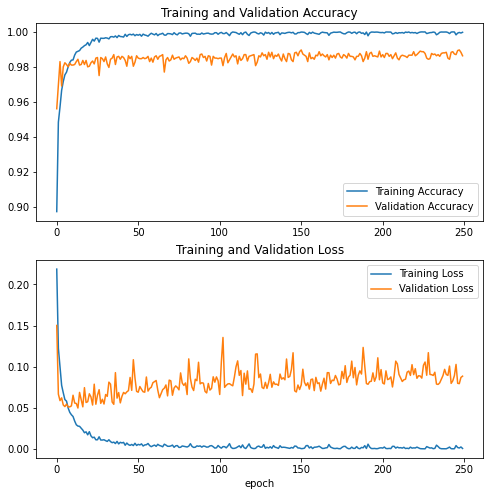

In [11]:
# gmp

PATH = '../cats_and_dogs_large/'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

BATCH_SIZE = 128
IMG_SIZE = (160, 160)
BUFFER_SIZE = BATCH_SIZE*5

train_dataset = image_dataset_from_directory(train_dir,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE)

validation_dataset = image_dataset_from_directory(validation_dir,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  image_size=IMG_SIZE)

train_dataset = train_dataset.prefetch(buffer_size=BUFFER_SIZE)
validation_dataset = validation_dataset.prefetch(buffer_size=BUFFER_SIZE)

# Create the base model 
base_model = tf.keras.applications.VGG16(input_shape=(160,160,3),
                                               include_top=False,
                                               weights='imagenet')
base_model.summary()

# process data
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.Rescaling(1./127.5, offset= -1)
])

# flattening
global_max = tf.keras.layers.GlobalMaxPool2D()

# final layer
prediction_layer = tf.keras.layers.Dense(1)

# construct a new network
inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = base_model(x)
x = global_max(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

print(len(base_model.trainable_variables))
print(len(model.trainable_variables))

base_learning_rate = 0.0001
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.Adam(lr=base_learning_rate/10),
              metrics=['accuracy'])

history_fine = model.fit(train_dataset,
                         epochs=250,
                         validation_data=validation_dataset)

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(history_fine.history['accuracy'], label='Training Accuracy')
plt.plot(history_fine.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(history_fine.history['loss'], label='Training Loss')
plt.plot(history_fine.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

Found 22000 files belonging to 2 classes.
Found 3000 files belonging to 2 classes.
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 160, 160, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 160, 160, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 160, 160, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 80, 80, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 80, 80, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 80, 80, 128)       147584    
____________________________________________

Epoch 35/250
172/172 [==============================] - 73s 424ms/step - loss: 0.0127 - accuracy: 0.9960 - val_loss: 0.0633 - val_accuracy: 0.9837
Epoch 36/250
172/172 [==============================] - 73s 427ms/step - loss: 0.0101 - accuracy: 0.9966 - val_loss: 0.0671 - val_accuracy: 0.9827
Epoch 37/250
172/172 [==============================] - 73s 424ms/step - loss: 0.0133 - accuracy: 0.9952 - val_loss: 0.0897 - val_accuracy: 0.9823
Epoch 38/250
172/172 [==============================] - 73s 426ms/step - loss: 0.0133 - accuracy: 0.9953 - val_loss: 0.0981 - val_accuracy: 0.9793
Epoch 39/250
172/172 [==============================] - 74s 428ms/step - loss: 0.0120 - accuracy: 0.9954 - val_loss: 0.0732 - val_accuracy: 0.9817
Epoch 40/250
172/172 [==============================] - 73s 426ms/step - loss: 0.0146 - accuracy: 0.9942 - val_loss: 0.1231 - val_accuracy: 0.9790
Epoch 41/250
172/172 [==============================] - 73s 427ms/step - loss: 0.0121 - accuracy: 0.9960 - val_loss: 0

Epoch 91/250
172/172 [==============================] - 74s 427ms/step - loss: 0.0022 - accuracy: 0.9995 - val_loss: 0.1015 - val_accuracy: 0.9840
Epoch 92/250
172/172 [==============================] - 73s 424ms/step - loss: 0.0027 - accuracy: 0.9991 - val_loss: 0.0874 - val_accuracy: 0.9847
Epoch 93/250
172/172 [==============================] - 74s 429ms/step - loss: 0.0042 - accuracy: 0.9989 - val_loss: 0.0801 - val_accuracy: 0.9850
Epoch 94/250
172/172 [==============================] - 73s 423ms/step - loss: 0.0050 - accuracy: 0.9983 - val_loss: 0.0790 - val_accuracy: 0.9843
Epoch 95/250
172/172 [==============================] - 73s 425ms/step - loss: 0.0043 - accuracy: 0.9984 - val_loss: 0.0730 - val_accuracy: 0.9847
Epoch 96/250
172/172 [==============================] - 73s 427ms/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.1009 - val_accuracy: 0.9850
Epoch 97/250
172/172 [==============================] - 73s 423ms/step - loss: 0.0032 - accuracy: 0.9989 - val_loss: 0

172/172 [==============================] - 73s 423ms/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.0884 - val_accuracy: 0.9877
Epoch 202/250
172/172 [==============================] - 73s 425ms/step - loss: 0.0042 - accuracy: 0.9985 - val_loss: 0.0883 - val_accuracy: 0.9850
Epoch 203/250
172/172 [==============================] - 73s 427ms/step - loss: 8.3080e-04 - accuracy: 0.9996 - val_loss: 0.1010 - val_accuracy: 0.9857
Epoch 204/250
172/172 [==============================] - 73s 425ms/step - loss: 5.0898e-04 - accuracy: 0.9998 - val_loss: 0.1140 - val_accuracy: 0.9853
Epoch 205/250
172/172 [==============================] - 73s 427ms/step - loss: 9.0383e-04 - accuracy: 0.9998 - val_loss: 0.1014 - val_accuracy: 0.9860
Epoch 206/250
172/172 [==============================] - 73s 427ms/step - loss: 2.9908e-04 - accuracy: 1.0000 - val_loss: 0.1232 - val_accuracy: 0.9847
Epoch 207/250
172/172 [==============================] - 73s 425ms/step - loss: 1.4763e-04 - accuracy: 1.0000 

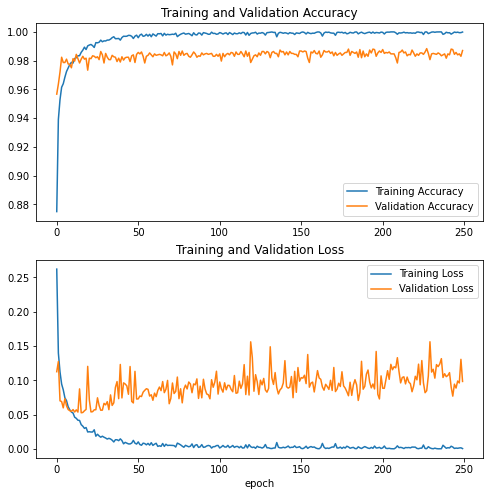

In [12]:
# gap

PATH = '../cats_and_dogs_large/'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

BATCH_SIZE = 128
IMG_SIZE = (160, 160)
BUFFER_SIZE = BATCH_SIZE*5

train_dataset = image_dataset_from_directory(train_dir,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE)

validation_dataset = image_dataset_from_directory(validation_dir,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  image_size=IMG_SIZE)

train_dataset = train_dataset.prefetch(buffer_size=BUFFER_SIZE)
validation_dataset = validation_dataset.prefetch(buffer_size=BUFFER_SIZE)

# Create the base model 
base_model = tf.keras.applications.VGG16(input_shape=(160,160,3),
                                               include_top=False,
                                               weights='imagenet')
base_model.summary()

# process data
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.Rescaling(1./127.5, offset= -1)
])

# flattening
global_average = tf.keras.layers.GlobalAveragePooling2D()

# final layer
prediction_layer = tf.keras.layers.Dense(1)

# construct a new network
inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = base_model(x)
x = global_average(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

print(len(base_model.trainable_variables))
print(len(model.trainable_variables))

base_learning_rate = 0.0001
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.Adam(lr=base_learning_rate/10),
              metrics=['accuracy'])

history_fine = model.fit(train_dataset,
                         epochs=250,
                         validation_data=validation_dataset)

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(history_fine.history['accuracy'], label='Training Accuracy')
plt.plot(history_fine.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(history_fine.history['loss'], label='Training Loss')
plt.plot(history_fine.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()